In [1]:
!pip install fastai
!pip install fastbook
!pip3 install -Uqq fastbook

In [2]:
import fastbook
from fastbook import *
from fastai.vision.widgets import *

In [5]:
#!unzip 'D:/Softwares/Yeshiva/Data Science/Project3/Project3/face_images.zip' -d 'D:/Softwares/Yeshiva/Data Science/Project3/Project3/face_images'

# defining the path to our training images
path = Path('D:/Softwares/Yeshiva/Data Science/Project3/Project3/face_images')

tfms = aug_transforms(do_flip = True, flip_vert = True, mult=2.0)
dls= ImageDataLoaders.from_folder(path, train = "train",
                                   valid_pct=0.15,
                                   item_tfms=Resize(128),
                                   batch_tfms=tfms, bs = 8,
                                   num_workers = 4)

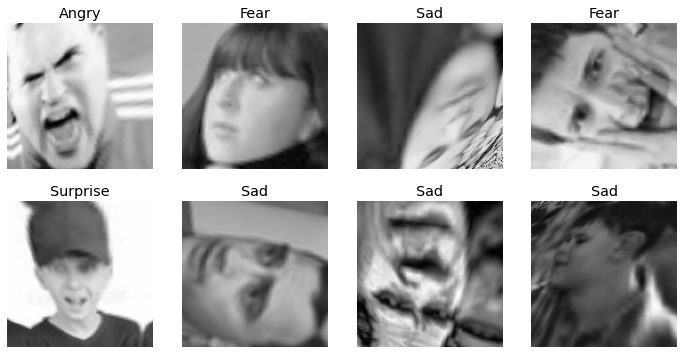

In [6]:
dls.train.show_batch(max_n=8, nrows=2)

In [7]:
model = vision_learner(dls, vgg19_bn, metrics=accuracy)
model.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,3.278366,2.143341,0.318182,00:25


epoch,train_loss,valid_loss,accuracy,time
0,2.985136,2.156878,0.409091,00:35
1,2.996409,2.394776,0.318182,00:35
2,2.761087,2.640275,0.318182,00:35
3,2.788006,2.558209,0.272727,00:35
4,2.659053,2.259223,0.363636,00:34
5,2.587004,2.456327,0.363636,00:34
6,2.584232,2.207371,0.363636,00:34
7,2.513597,2.562750,0.318182,00:34
8,2.423320,2.694542,0.272727,00:34
9,2.350996,2.445561,0.181818,00:35


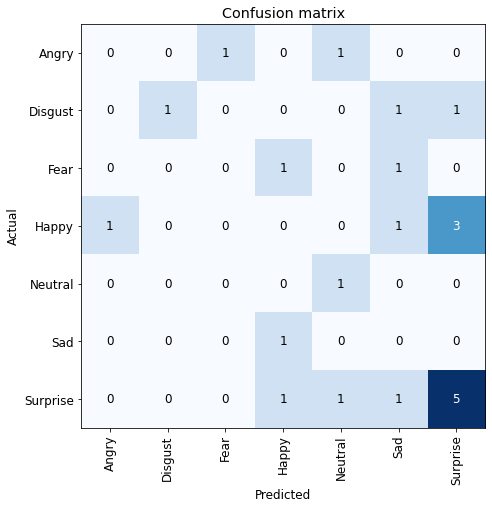

In [8]:
interp = ClassificationInterpretation.from_learner(model)
interp.plot_confusion_matrix(figsize=(7,7))

SuggestedLRs(valley=0.00010964782268274575)

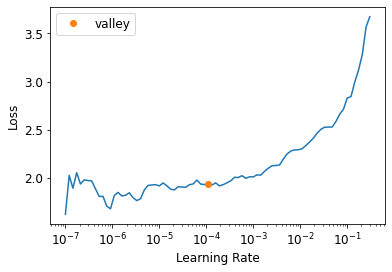

In [9]:
model.lr_find()

In [10]:
model.unfreeze()
model.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.943063,2.598991,0.227273,00:26


epoch,train_loss,valid_loss,accuracy,time
0,1.933657,2.604370,0.227273,00:35
1,1.839062,2.552508,0.318182,00:34
2,1.807575,2.354731,0.227273,00:36
3,1.742312,2.397096,0.272727,00:33
4,1.716899,2.557949,0.272727,00:33


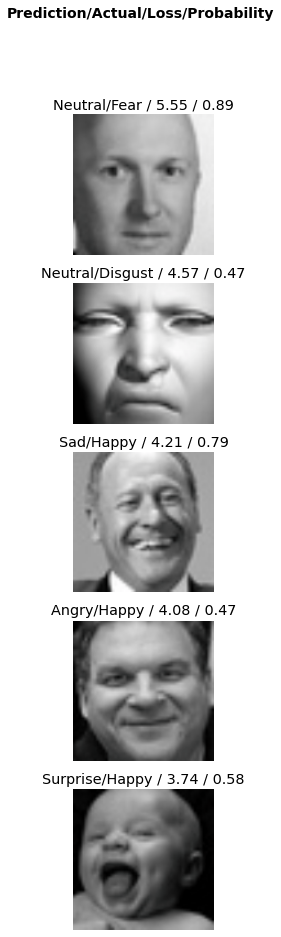

In [11]:
interp.plot_top_losses(10, nrows=5)

In [15]:
model.export('D:/Softwares/Yeshiva/Data Science/Project3/Project3/model/export.pkl')

In [16]:
model_inf = load_learner('D:/Softwares/Yeshiva/Data Science/Project3/Project3/model/export.pkl')

In [17]:
# Show classes in the model
model_inf.dls.vocab

['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

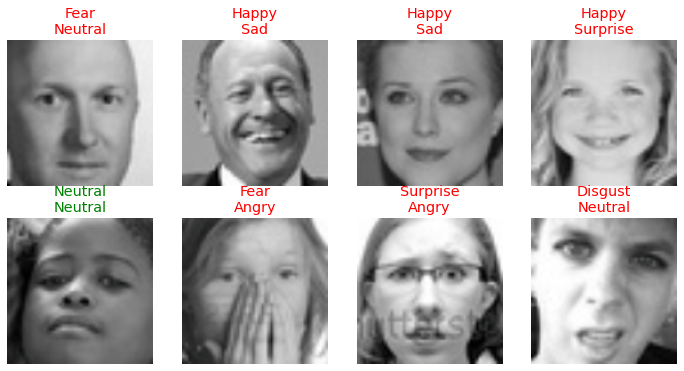

In [18]:
model.show_results()

In [19]:
btn_upload = widgets.FileUpload()
btn_run = widgets.Button(description='Classify')
out_pl = widgets.Output()
lbl_pred = widgets.Label()

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = model_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [20]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your face!'), 
      btn_upload, btn_run, out_pl, lbl_pred])